## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/knnproj_data.txt')

In [3]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
data.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

## Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS' ,axis =1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(data.drop('TARGET CLASS', axis=1))

In [8]:
# converting all the scaled features into a dataframe 

scaled_df = pd.DataFrame(scaled_features)
scaled_df.columns = ['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC']


In [9]:
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Model Building 

In [10]:
X = scaled_df 
y = data['TARGET CLASS']

X.shape ,y.shape

((1000, 10), (1000,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 10), (330, 10), (670,), (330,))

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
y_predict = model.predict(X_test)

## Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

print('Accuracy Score using KNN : {}\n'.format(accuracy_score(y_test, y_predict)))
print('Classification Report using KNN :\n',classification_report(y_test, y_predict))

Accuracy Score using KNN : 0.7151515151515152

Classification Report using KNN :
               precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



<AxesSubplot:>

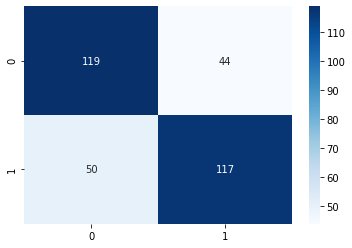

In [15]:
confusion = confusion_matrix(y_test ,y_predict)
sns.heatmap(confusion ,annot=True ,cmap='Blues',fmt='.4g')

##  Choosing best number of neighburs for our model

In [16]:
neighbors_with_accuracies = []

for i in range(1,50):
    model =KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train ,y_train)
    y_predict = model.predict(X_test) 
    accuracy = accuracy_score(y_test ,y_predict)
    neighbors_with_accuracies.append(accuracy)


In [17]:
neighbors_with_accuracies

[0.7151515151515152,
 0.7303030303030303,
 0.7696969696969697,
 0.7606060606060606,
 0.7787878787878788,
 0.7909090909090909,
 0.803030303030303,
 0.8090909090909091,
 0.8181818181818182,
 0.803030303030303,
 0.806060606060606,
 0.8090909090909091,
 0.8212121212121212,
 0.8272727272727273,
 0.8333333333333334,
 0.8272727272727273,
 0.8181818181818182,
 0.8272727272727273,
 0.8303030303030303,
 0.8272727272727273,
 0.8242424242424242,
 0.8212121212121212,
 0.8242424242424242,
 0.8272727272727273,
 0.8242424242424242,
 0.8242424242424242,
 0.8333333333333334,
 0.8303030303030303,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8303030303030303,
 0.8363636363636363,
 0.8303030303030303,
 0.8242424242424242,
 0.8181818181818182,
 0.8212121212121212,
 0.8212121212121212,
 0.8333333333333334,
 0.8212121212121212,
 0.8272727272727273,
 0.8242424242424242,
 0.8272727272727273,
 0.8272727272727273,
 0.8333333333333334,
 0.8272727272727273,
 0.8303030303030303,
 0.8272727272727

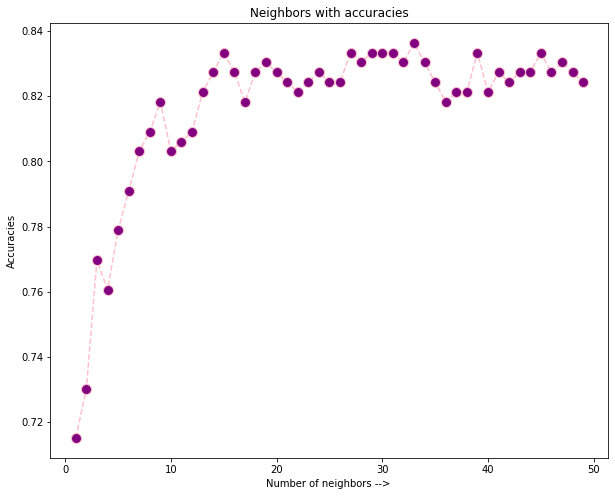

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50) ,neighbors_with_accuracies ,color='pink' ,linestyle='dashed' ,marker='o' ,markerfacecolor='purple' ,markersize=10)

plt.title('Neighbors with accuracies')
plt.xlabel('Number of neighbors --> ')
plt.ylabel('Accuracies')
plt.show()

## Retraining with best value of the neighbor

In [20]:
model = KNeighborsClassifier(n_neighbors=neighbors_with_accuracies.index(max(neighbors_with_accuracies)))
model.fit(X_train ,y_train)


KNeighborsClassifier(n_neighbors=32)

In [21]:
y_predict_ = model.predict(X_test)
print("Accuracy Score using KNN:", accuracy_score(y_test, y_predict_))

Accuracy Score using KNN: 0.8303030303030303


<AxesSubplot:>

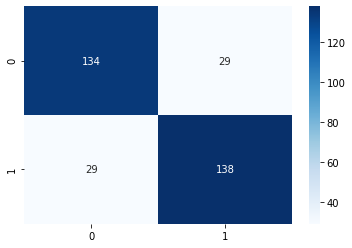

In [22]:
confusion = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion, annot=True, cmap='Blues',fmt='.4g')